In [1]:
# import libraries for analysis 
%matplotlib inline 
import numpy as np
import pandas as pd 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 

import datetime 

In [2]:
#Read the CSV file

airbnb_nyc = pd.read_csv("Resource/AB_NYC_2019.csv")

#Examine the head of the CSV file, see some NaN values 
airbnb_nyc.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
#Check the amount of entries (rows)
len(airbnb_nyc)

48895

In [4]:
#Examine the data type of every column 

airbnb_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Data Wrangling 

In [5]:
#Reexamine which columns have NaN values 

airbnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Name and host_name are irrelevant for our data analysis. However, last_review and reviews_per_month do jump out since it has a high number of NaN values. Last_review is a date so if there was not reviews for the listing- no date will exist. As for reviews_per_month, we can replace the NaN with 0.0 since 0 total reviews equates to 0.0 reviews_per_month. With this logic, we can start removing columns and replacing NaN values.

In [6]:
#Drop insignificant columns: id, host_name, last_review. 

airbnb_nyc.drop(['id', 'host_name', 'last_review'], axis =1 , inplace= True)

#Check that columns have been removed
airbnb_nyc.head(20)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [7]:
#Fill reviews_per_month NaN values with 0 

airbnb_nyc.fillna({'reviews_per_month': 0}, inplace= True)

#Confirm that NaN values have been replaced
airbnb_nyc.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [8]:
#Check for unique neighbourhood groups 
airbnb_nyc['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
#Check for unique neighbourhoods
airbnb_nyc['neighbourhood'].unique()



array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [10]:
airbnb_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

So far, we examined and cleaned the data. We also looked at the unique columns: neighbourhood groups, neighbourhoods, and room type for further analysis. 

# Data Exploration 

In [11]:
# Lets examine the top 10 hosts
super_hosts = airbnb_nyc['host_id'].value_counts()

top_10_hosts = super_hosts.head(10)

top_10_hosts 


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [12]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})


Text(0, 0.5, 'Number of Listings')

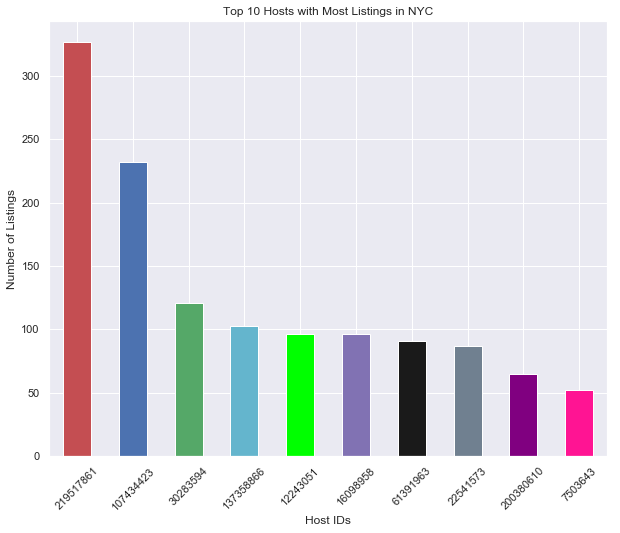

In [13]:
colors = ['r', 'b', 'g', 'c', 'lime', 'm', 'k', 'slategrey', 'purple', 'deeppink']

chart  = top_10_hosts.plot(kind='bar', rot=45, color=colors)
chart.set_title("Top 10 Hosts with Most Listings in NYC")
chart.set_xlabel("Host IDs")
chart.set_ylabel("Number of Listings")



THe first host has 300+ listings. Third through tenth hosts have evenly distributed amount of listings.

In [14]:
#Lets examine the neighbourhood groups ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#Brooklyn 
brooklyn = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Brooklyn']

#Creating a new column for called price for each neighbourhood group
price_brook = brooklyn[['price']]

#Manhattan
manh = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Manhattan']
price_manh = manh[['price']]

#Queens 
queens = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Queens']
price_queens = queens[['price']]

#Staten Island 
staten_i = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Staten Island']
price_staten_i = staten_i [['price']]

#Bronx 

bronx = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Bronx']
price_bronx = bronx[['price']]


#Create a list to hold all the prices by neighbourhood groups 
neigh_price_list = [price_brook, price_manh, price_queens, price_staten_i, price_bronx]


In [15]:
#An empty list to collect the price distribution for each neighbourhood 

neigh_price_dis = []

neigh_groups = ['Brooklyn', 'Manhattan' , 'Queens', 'Staten Island', 'Bronx']

#Loop through to get stats for price distribution 

for x in neigh_price_list:
    prices = x.describe(percentiles = [0.25, 0.50, 0.75])
    prices = prices.iloc[3:]
    prices.reset_index(inplace=True)
    prices.rename(columns={'index': 'Statistics'}, inplace=True)
    neigh_price_dis.append(prices)
    
    
#Change the name of the price columns to reflect the correct neighbourhood groups 

neigh_price_dis[0].rename(columns={'price': neigh_groups[0]}, inplace=True)
neigh_price_dis[1].rename(columns={'price': neigh_groups[1]}, inplace=True)
neigh_price_dis[2].rename(columns={'price': neigh_groups[2]}, inplace=True)
neigh_price_dis[3].rename(columns={'price': neigh_groups[3]}, inplace=True)
neigh_price_dis[4].rename(columns={'price': neigh_groups[4]}, inplace=True)


#Create final dataframe for statistics 

stats_df = neigh_price_dis 

stats_df = [df.set_index('Statistics') for df in stats_df]

stats_df = stats_df[0].join(stats_df[1:])

stats_df 

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Statistics,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


The max seems extremely high; it's unlikely that one night rental would run $10,000 on Airbnb. We will need to create a sub dataframe to get a better visualization. Also, some listings have a min of $0 which is hihgly unlikely since it will be listed as free.

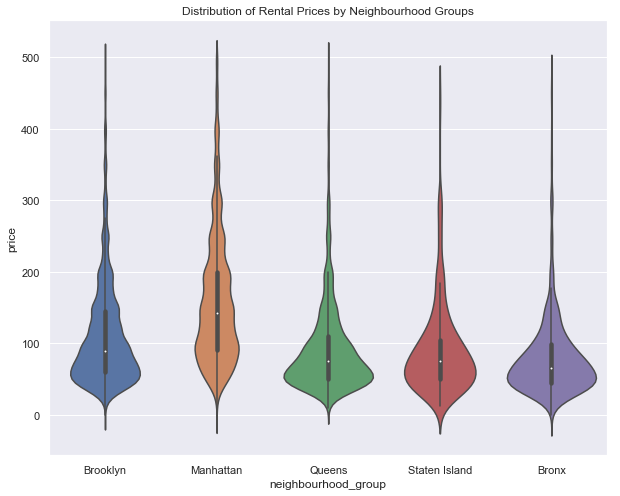

In [24]:
neigh_group_df = airbnb_nyc[airbnb_nyc.price < 500]

#using a violin plot to show density and allows deeper understanding of the distribution
violin_plot = sns.violinplot(x = 'neighbourhood_group', y='price', data=neigh_group_df)

violin_plot.set_title('Distribution of Rental Prices by Neighbourhood Groups')

plt.savefig('rentalpricedistribution.png')

Based on this violin chart, Manhattan has the widest distribution (wide range of prices) with $ 150 as average. Brooklyn has the second highest distribution. Queens and Staten Island have similar distributions and averages.  Bronx is the cheapest of them all. This violin chart is logical since Manhattan is known as one of the most expensive places in the world to live in whereas Bronx has a lower standard of living costs.  

In [17]:
# Next, let's look at the unique neighborhoods again.

airbnb_nyc['neighbourhood'].unique()

#Since there are too many, we will just focus on the top 10 neighborhoods listed just like the hosts 

airbnb_nyc['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

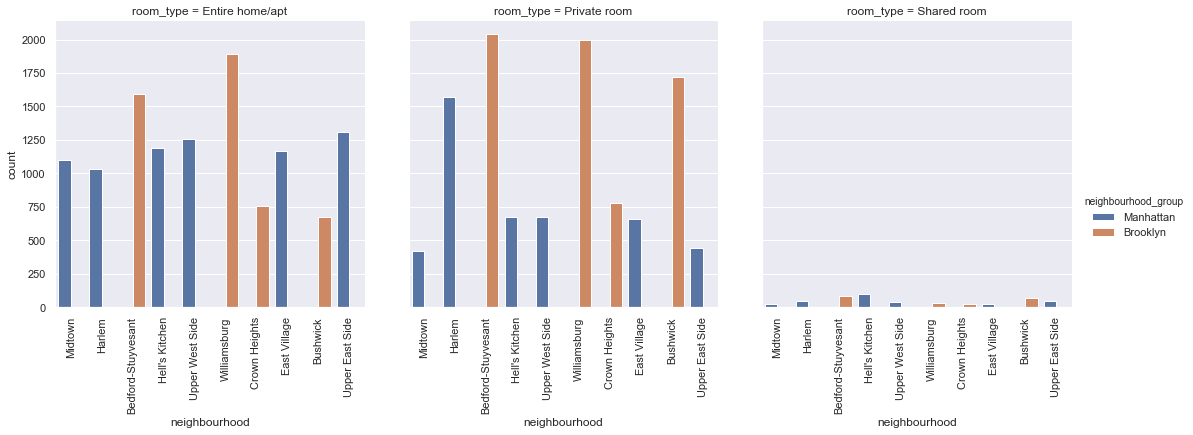

In [25]:
#Create new df for top 10 neighbourhoods by listings 

top_neigh = airbnb_nyc.loc[airbnb_nyc['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem','Bushwick', 'Upper West Side', 'Hell\'s Kitchen', 'East Village', 'Upper East Side','Crown Heights', 'Midtown'])]

#Use categorical plot to view by room_type, neighboorhoods, and neighbourhood_groups
new_chart = sns.catplot(x='neighbourhood', hue='neighbourhood_group', data=top_neigh, col='room_type', kind= 'count')

new_chart.set_xticklabels(rotation=90)

plt.savefig('neigh_group_listings.png')

Each subplot is for the room type: entire home/apartment, private room, and shared room. The X-axis is the neighbourhoods and Y-axis is the count of listings in that particular neighbourhood. The first observation is the limited availability of shared room listings. We could attribute this to the small living conditions of New York City. Out of the neighbourhoods groups, only Manhattan and Brooklyn are presented which is to no suprise since they are the most traveled areas in New York City.Williamsburg and Bedford-Stuyvesant is most popular neighbourhood in Brooklyn. Harlem has the most listings in Manhattan.

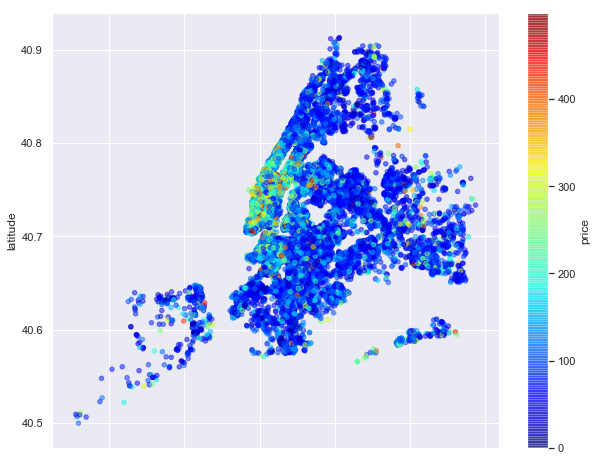

In [19]:
# We can create a scatter plot with the Lat-Long Coordinates to visualize a map 

heat_map = neigh_group_df.plot(kind = 'scatter', x = 'longitude', y='latitude', c= 'price', cmap =plt.get_cmap('jet'), colorbar=True, alpha=0.5, figsize=(10,8))

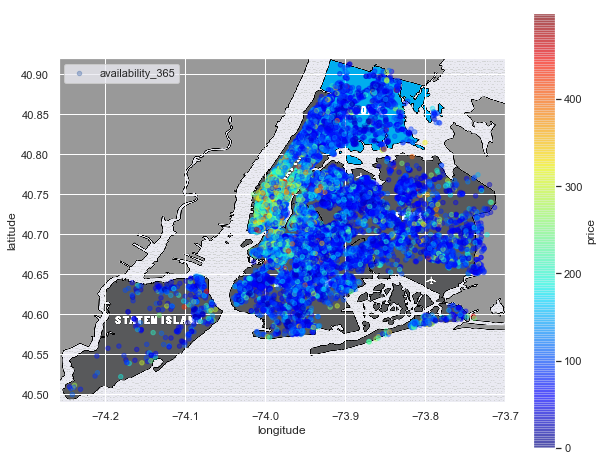

In [20]:
import urllib

#Create the figure size 

plt.figure(figsize=(10,8))

#Upload the JPG image found on Google

image = urllib.request.urlopen("http://www.agefriendlyneighborhoods.nyc/wp-content/uploads/2015/03/AFN-Borough-MapBronx-Highlight1200.png")

nyc_image = plt.imread(image)

plt.imshow(nyc_image, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])

ax=plt.gca()

neigh_group_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)


In [21]:
top_reviewed = airbnb_nyc.nlargest(10, 'number_of_reviews')

top_reviewed 

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [22]:
# Find average price of the top 10 most reviewed listings 

average_price = top_reviewed.price.mean()

print(f'Average price per night: ${average_price}')

Average price per night: $65.4


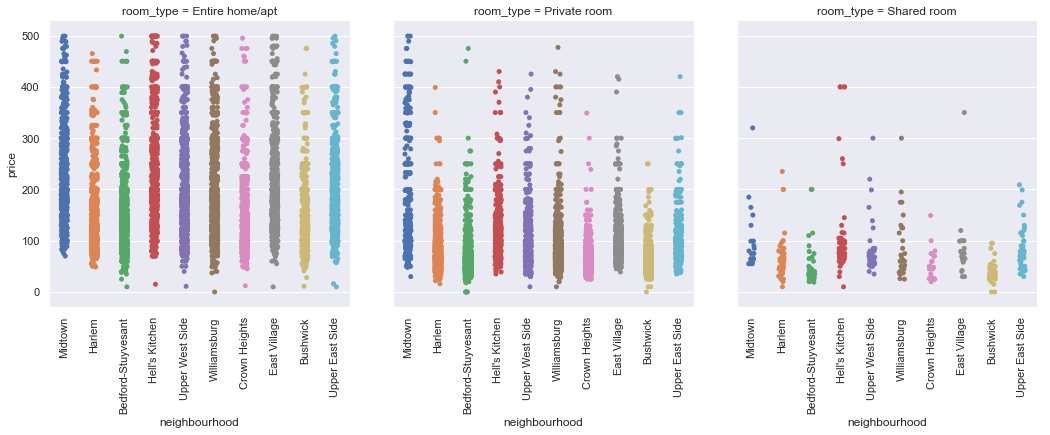

In [26]:

top_neigh_price = neigh_group_df.loc[neigh_group_df['neighbourhood'].isin(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem','Bushwick', 'Upper West Side', 'Hell\'s Kitchen', 'East Village', 'Upper East Side','Crown Heights', 'Midtown'])]

#Use categorical plot to view by room_type, neighboorhoods, and neighbourhood_groups
neigh_price = sns.catplot(x='neighbourhood', y='price', data=top_neigh_price, col='room_type')

neigh_price.set_xticklabels(rotation=90)

plt.savefig('neigh_group_price.png')

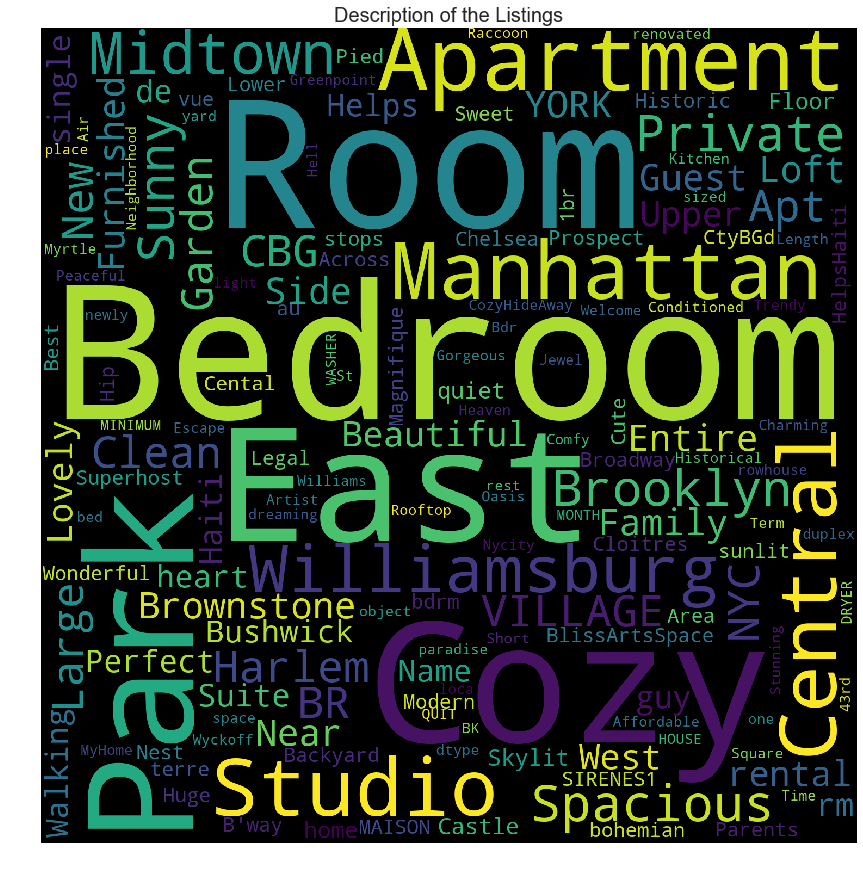

<Figure size 1080x1080 with 0 Axes>

In [33]:
# description of the listings

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'black', width = 1500, height = 1500).generate(str(airbnb_nyc['name']))
plt.title('Description of the Listings', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()
plt.savefig('listing_descriptions.png')

Based on this WordCloud diagram, it shows that hosts are simply describing their lisitng in a short form with very specific terms for easier search by potential travelers. Word such as room, bedroom, cozy, apartment, studio, park, and private. Since Airbnb is used internationally, hosts need to use simple terms to describe the listing and area surrounding the it. 